In [438]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
drug_data_path = "data/mouse_drug_data.csv"
trial_data_path = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drugrawdata = pd.read_csv(drug_data_path)
trialrawdata = pd.read_csv(trial_data_path)

# Combine the data into a single dataset
combined = trialrawdata.merge(drugrawdata,on='Mouse ID', how='left')
combined.set_index('Mouse ID')
#combined.loc[combined['Mouse ID']=='g989p',:]


# Display the data table for preview
print(combined.keys())
combined.head()


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [439]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
MeanTumorVolume = combined.groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
MTV = pd.DataFrame(MeanTumorVolume.loc[:,'Tumor Volume (mm3)'])


# Preview DataFrame
MTV.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [440]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
MeanTumorVolumeSTD = combined.groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
MTVSTD = pd.DataFrame(MeanTumorVolumeSTD.loc[:,'Tumor Volume (mm3)'])

# Preview DataFrame
MTVSTD.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [441]:
# Minor Data Munging to Re-Format the Data Frames
MTV_rf = MTV.unstack(level=0)
# Preview that Reformatting worked

MTV_rf['Tumor Volume (mm3)'].head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.235574,43.944859,47.474979,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.066132,42.531957,49.360148,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.051160,41.495061,51.442472,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.264805,40.238325,54.004459,53.170334


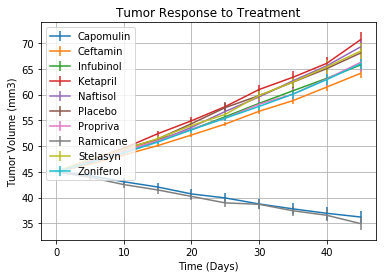

In [442]:
# Generate the Plot (with Error Bars)
MTV_rf['Tumor Volume (mm3)'].plot(kind='line', yerr=MTVSTD['Tumor Volume (mm3)'].unstack(level=0))

plt.legend(loc="upper left")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(b=None, which='major', axis="both")
plt.rcParams['figure.figsize']=[10,5]

# Save the Figure

plt.savefig("./TumorResponsetoTreatmentGraph.png")



In [443]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [444]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
MetaStaticCount = combined.groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
MSC = pd.DataFrame(MetaStaticCount.loc[:,'Metastatic Sites'])

# Preview DataFrame
MSC.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [445]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MetastaticSiteCountSTD = combined.groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
MSCSTD = pd.DataFrame(MetastaticSiteCountSTD.loc[:,'Metastatic Sites'])

# Preview DataFrame
MSCSTD.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [446]:
# Minor Data Munging to Re-Format the Data Frames
MSC_rf = MSC.unstack(level=0)

# Preview that Reformatting worked
MSC_rf.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.333333  0.120000  0.250000  0.166667  
10         0.590909  0.250000  0.500000  0.500000  
15         0.750000  0.333333  0.818182  0.809524  
20         1.000000  0.347826  0.950000  1.294118

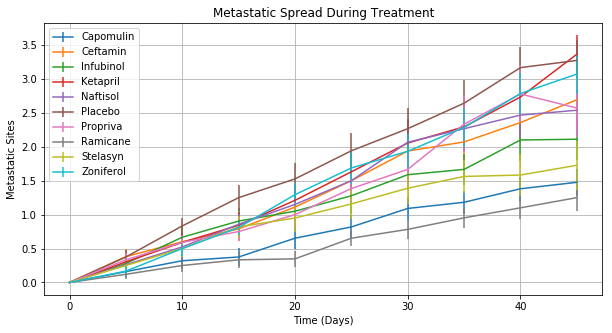

In [447]:
# Generate the Plot (with Error Bars)
MSC_rf['Metastatic Sites'].plot(kind='line', yerr=MSCSTD['Metastatic Sites'].unstack(level=0))

plt.legend(loc="upper left")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(b=None, which='major', axis="both")
plt.rcParams['figure.figsize']=[10,5]

# Save the Figure

plt.savefig("./MetastaticSiteCountTreatmentGraph.png")


## Survival Rates

In [448]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MouseCount = combined.groupby(['Drug','Timepoint']).count()

# Convert to DataFrame
MC = pd.DataFrame(MouseCount.loc[:,'Mouse ID'])

# Preview DataFrame
MC.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [449]:
# Minor Data Munging to Re-Format the Data Frames
MC_rf = MC.unstack(level=0)

# Preview the Data Frame
MC_rf['Mouse ID'].head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


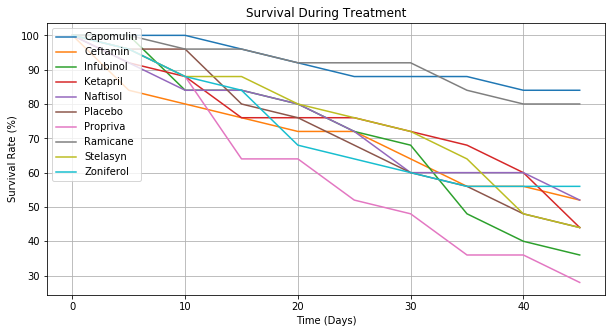

In [450]:
# Generate the Plot (Accounting for percentages)
MCP = MC_rf['Mouse ID']*4
MCP.plot(kind='line')

plt.legend(loc="upper left")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(b=None, which='major', axis="both")
plt.rcParams['figure.figsize']=[10,5]

# Save the Figure

plt.savefig("./SurvivalRateGraph.png")

# Show the Figure
#plt.show()

## Summary Bar Graph

In [451]:
# Calculate the percent changes for each drug
MTV2 = MeanTumorVolume.unstack(level=1)
MTV3=pd.DataFrame((MTV2['Tumor Volume (mm3)'][45]/45 - 1)*100).transpose()
Drugs = [i for i in MTV3.keys()]


List = (MTV2['Tumor Volume (mm3)'][45]/45 - 1)*100
Dict = {}
for i in range(0,len(Drugs)):
    Dict[Drugs[i]] = List[i]
Dict

Values = [i for i in Dict.values()]
Values

[-19.47530266666665,
 42.51649185811965,
 46.12347172839504,
 57.02879468484847,
 53.923347136752156,
 51.297960484848495,
 47.24117486349206,
 -22.320900462222227,
 52.08513429090908,
 46.579750865079376]

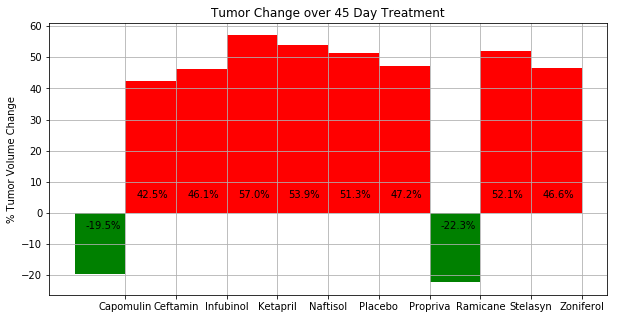

In [455]:
# Store all Relevant Percent Changes into a Tuple
#MTV3.transpose()
# Splice the data between passing and failing drugs
Colors=[]
for i in Dict.keys():
    if Dict[i]<0:
        Colors.append('green')
    else:
        Colors.append('red')

#print(Colors)


# Orient widths. Add labels, tick marks, etc. 
plt.bar(Drugs,Values, color = Colors, width = -1, align="edge" )

plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(b=None, which='major', axis="both")
plt.rcParams['figure.figsize']=[10,5]



# Use functions to label the percentages of changes
def perc(number):
    string = f"{round(number,1)}%"
    return string

    # Call functions to implement the function calls
for i in range(0,len(Values)):
    if Values[i]<0:
        height = -5
    else:
        height = 5
    plt.text(int(i)-0.78,height,perc(Values[i]))

# Save the Figure
plt.savefig("./TumorDeltaPercGraph.png")

# Show the Figure
plt.show()